In [1]:
import drishtypy.utils.get_cuda as cuda
device = cuda.get_device()

cuda available
Device set to :  cuda:0


In [2]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

SEED = 1
batch_size=512

In [3]:
import os 
path = os.getcwd()
path  = path + '/dataset/'
print(path)

/home/abhinav/Drishtypy/dataset/


In [4]:
import drishtypy.data.returns_dataloader as dl
trainset, testset, train_loader, test_loader = dl.get_dataloader(batch_size=batch_size, num_workers=4, cuda = True,path = path)

['/home/abhinav/Drishtypy', '/home/abhinav/anaconda3/lib/python38.zip', '/home/abhinav/anaconda3/lib/python3.8', '/home/abhinav/anaconda3/lib/python3.8/lib-dynload', '', '/home/abhinav/.local/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages', '/home/abhinav/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/home/abhinav/.ipython', '/home/abhinav/Drishtypy']
Running over Cuda !!  True
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

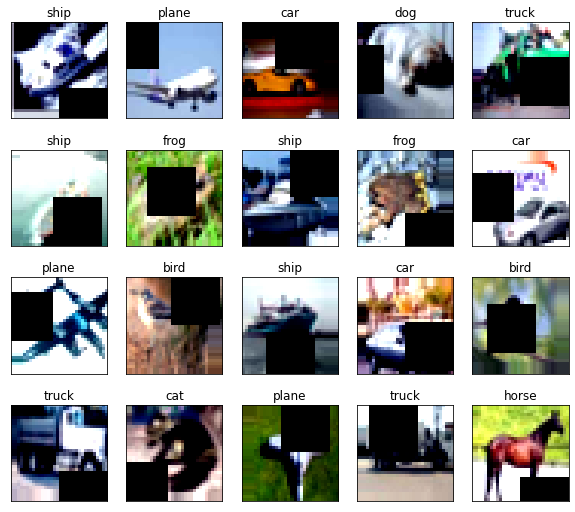

In [5]:
import drishtypy.viz.do_plots as plt
plt.plot_dataset_images(device, classes, train_loader)

In [6]:
import drishtypy.models.resnet_S11 as mod
model = mod.ResNet_11()




In [7]:
from drishtypy.learner.learner import model_summary
model_summary(model, device, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

In [8]:
# from drishtypy.utils.graphic_summary import graphical_summary
# graphical_summary(model)


In [9]:
from tqdm import tqdm
from drishtypy.learner.learner import build_model

Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.12E-01


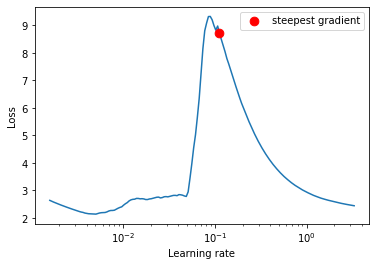

Using Learning Rate :  0.005052631065335681


In [10]:
import torch.optim as optim
import torch.nn as nn
from torch_lr_finder import LRFinder
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95, nesterov=True)
criterion = nn.CrossEntropyLoss()
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200, step_mode="exp")
lr_finder.plot()
loss = lr_finder.history['loss']
lr = lr_finder.history['lr']
    
lr = lr[loss.index(min(loss))]
print('Using Learning Rate : ', lr)
lr_finder.reset()

In [11]:
import torch.nn as nn
from drishtypy.utils.LR_Test import lr_test
max_lr = 0.1
min_lr = 0.001

print('Max LR :{} and MIN LR : {}'.format(max_lr,min_lr))
epoch = 20


Max LR :0.1 and MIN LR : 0.001


epoch = 1 Lr = 0.001  Loss=1.5986435413360596 Batch_id=97 Accuracy=32.05: 100%|██████████| 98/98 [00:18<00:00,  5.38it/s]
epoch = 2 Lr = 0.00595  Loss=1.6370935440063477 Batch_id=97 Accuracy=27.64: 100%|██████████| 98/98 [00:18<00:00,  5.33it/s]
epoch = 3 Lr = 0.0109  Loss=1.951003074645996 Batch_id=97 Accuracy=18.13: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s] 
epoch = 4 Lr = 0.01585  Loss=2.173109531402588 Batch_id=97 Accuracy=14.84: 100%|██████████| 98/98 [00:19<00:00,  5.09it/s] 
epoch = 5 Lr = 0.0208  Loss=2.8529462814331055 Batch_id=97 Accuracy=11.86: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]
epoch = 6 Lr = 0.02575  Loss=2.4357998371124268 Batch_id=97 Accuracy=12.77: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]
epoch = 7 Lr = 0.030699999999999998  Loss=2.4904956817626953 Batch_id=97 Accuracy=11.10: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]
epoch = 8 Lr = 0.03565  Loss=2.360445022583008 Batch_id=97 Accuracy=12.63: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s] 

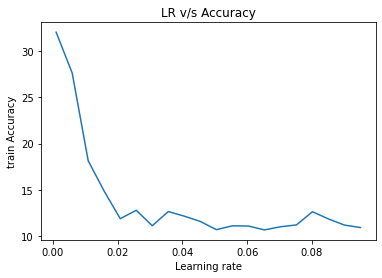

In [12]:
lr_test(max_lr, min_lr,device,epoch,model,criterion,train_loader,momemtum = 0.9,weight_decay=0.0005, plot= True)

Tried different range near the best LR but not getting accuracy above above hence expanding the range difference of 100


In [13]:
# build and train the model
model_name = "Resnet11"
EPOCHS = 24
model =  model.to(device) # use GPU

# using L1 and L2 regularization
train_acc, train_losses, test_acc, test_losses = build_model(model, 
                                                            device, 
                                                            trainloader=train_loader, 
                                                            testloader=test_loader, 
                                                            epochs=EPOCHS,
                                                            L1_loss_flag=False,
                                                            L2_penalty_val=0.005,
                                                            lr = 0.1)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


Loss=2.135541 Batch_id=97 Accuracy=32.22: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]

LR: [0.020120858895705522]



/home/abhinav/anaconda3/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:1205: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.891651, Accuracy: 4431/10000 (44.31%)

EPOCH: 1


Loss=1.522181 Batch_id=97 Accuracy=48.79: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]

LR: [0.04014171779141105]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.129706, Accuracy: 5922/10000 (59.22%)

EPOCH: 2


Loss=1.144458 Batch_id=97 Accuracy=59.66: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]

LR: [0.06016257668711657]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.146910, Accuracy: 6033/10000 (60.33%)

EPOCH: 3


Loss=0.930735 Batch_id=97 Accuracy=66.99: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]

LR: [0.0801834355828221]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.807162, Accuracy: 7120/10000 (71.20%)

EPOCH: 4


Loss=0.815007 Batch_id=97 Accuracy=71.57: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]

LR: [0.09994634801288937]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.361762, Accuracy: 5782/10000 (57.82%)

EPOCH: 5


Loss=0.715602 Batch_id=97 Accuracy=74.91: 100%|██████████| 98/98 [00:19<00:00,  4.93it/s]

LR: [0.09468845327604726]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.705941, Accuracy: 7540/10000 (75.40%)

EPOCH: 6


Loss=0.644911 Batch_id=97 Accuracy=77.69: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]

LR: [0.08943055853920516]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 1.183604, Accuracy: 6295/10000 (62.95%)

EPOCH: 7


Loss=0.610306 Batch_id=97 Accuracy=78.84: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]

LR: [0.08417266380236306]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.564890, Accuracy: 8067/10000 (80.67%)

EPOCH: 8


Loss=0.600902 Batch_id=97 Accuracy=79.31: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

LR: [0.07891476906552095]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.691211, Accuracy: 7644/10000 (76.44%)

EPOCH: 9


Loss=0.576638 Batch_id=97 Accuracy=80.11: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]

LR: [0.07365687432867885]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.511351, Accuracy: 8284/10000 (82.84%)

EPOCH: 10


Loss=0.554517 Batch_id=97 Accuracy=80.81: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

LR: [0.06839897959183674]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.748531, Accuracy: 7563/10000 (75.63%)

EPOCH: 11


Loss=0.537410 Batch_id=97 Accuracy=81.51: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]

LR: [0.06314108485499463]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.755287, Accuracy: 7434/10000 (74.34%)

EPOCH: 12


Loss=0.520930 Batch_id=97 Accuracy=81.94: 100%|██████████| 98/98 [00:19<00:00,  4.91it/s]

LR: [0.05788319011815253]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.733624, Accuracy: 7583/10000 (75.83%)

EPOCH: 13


Loss=0.506639 Batch_id=97 Accuracy=82.61: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]

LR: [0.05262529538131042]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.529756, Accuracy: 8179/10000 (81.79%)

EPOCH: 14


Loss=0.485246 Batch_id=97 Accuracy=83.31: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

LR: [0.047367400644468316]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.524304, Accuracy: 8266/10000 (82.66%)

EPOCH: 15


Loss=0.470826 Batch_id=97 Accuracy=83.91: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

LR: [0.042109505907626216]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.570274, Accuracy: 8085/10000 (80.85%)

EPOCH: 16


Loss=0.450932 Batch_id=97 Accuracy=84.35: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]

LR: [0.0368516111707841]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.492808, Accuracy: 8371/10000 (83.71%)

EPOCH: 17


Loss=0.435054 Batch_id=97 Accuracy=85.14: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]

LR: [0.031593716433942]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.511680, Accuracy: 8256/10000 (82.56%)

EPOCH: 18


Loss=0.414487 Batch_id=97 Accuracy=85.79: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

LR: [0.0263358216970999]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.446179, Accuracy: 8545/10000 (85.45%)

EPOCH: 19


Loss=0.382420 Batch_id=97 Accuracy=86.86: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]

LR: [0.021077926960257787]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.347635, Accuracy: 8809/10000 (88.09%)

EPOCH: 20


Loss=0.354836 Batch_id=97 Accuracy=87.75: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]

LR: [0.015820032223415686]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.370495, Accuracy: 8771/10000 (87.71%)

EPOCH: 21


Loss=0.310638 Batch_id=97 Accuracy=89.62: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]

LR: [0.010562137486573572]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.356731, Accuracy: 8784/10000 (87.84%)

EPOCH: 22


Loss=0.256990 Batch_id=97 Accuracy=91.22: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]

LR: [0.005304242749731472]



  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.300780, Accuracy: 8970/10000 (89.70%)

EPOCH: 23


Loss=0.202383 Batch_id=97 Accuracy=93.19: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]

LR: [4.634801288937174e-05]



Test set: Average loss: 0.228287, Accuracy: 9233/10000 (92.33%)



In [14]:
from drishtypy.learner.learner import get_test_accuracy,class_based_accuracy
get_test_accuracy(model, device, test_loader)
class_based_accuracy(model, device, classes, test_loader)


Accuracy of the network on the 10000 test images: 92.33%

Accuracy of plane : 90 %
Accuracy of   car : 100 %
Accuracy of  bird : 85 %
Accuracy of   cat : 100 %
Accuracy of  deer : 100 %
Accuracy of   dog : 62 %
Accuracy of  frog : 100 %
Accuracy of horse : 87 %
Accuracy of  ship : 100 %
Accuracy of truck : 100 %



Ploting Accuracy and Loss history: Resnet11



/home/abhinav/Drishtypy/drishtypy/viz/do_plots.py:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1, x_size + 1), x_size / 10)
/home/abhinav/Drishtypy/drishtypy/viz/do_plots.py:38: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1, x_size + 1), x_size / 10)


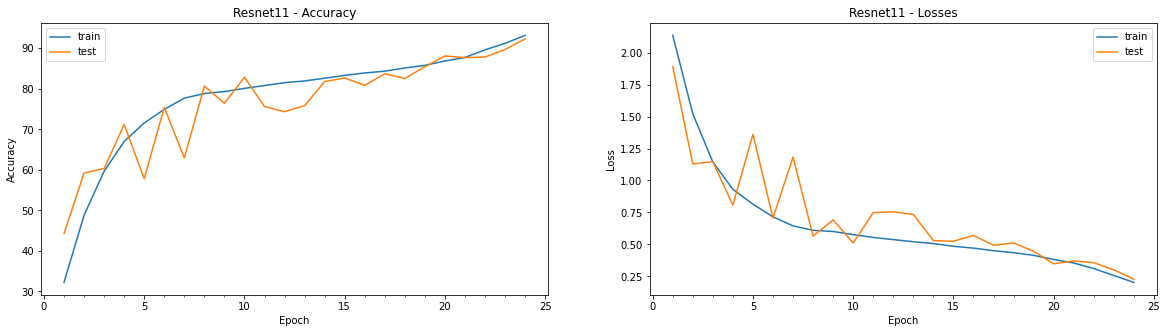

In [15]:
from drishtypy.viz.do_plots import  plot_model_history
print("\nPloting Accuracy and Loss history: {}\n".format(model_name))
plot_model_history(model_name, 
                   train_acc,test_acc,
                   train_losses,test_losses,
                   save_filename = "model_history")

In [16]:
# import gradcam.gradcam_abs as gradcamAbs1
import drishtypy.viz.gradcam.gradcam_abs as gradcamAbs1
from drishtypy.data.data_utils import find_stats
means,stds = find_stats(path)

/home/abhinav/Drishtypy
Files already downloaded and verified
Files already downloaded and verified
mean 0.49186864
standard dev 0.24697131
mean 0.48265335
standard dev 0.24338901
mean 0.44717798
standard dev 0.26159254


In [17]:
path = os.getcwd() + '/Out'


In [18]:
# config = dict(model_type='resnet', arch=model, layer_name='layer4')
# gcam = gradcamAbs1.GradCamAbs(device, config, means, stds)

# gradcam_images, pred_results = gcam.applyOnMisclassifiedImages(dataloader=test_loader, num_of_images=25)

# gcam.plot_results(gradcam_images, pred_results, classes, save_filename="gradcam_result_details")

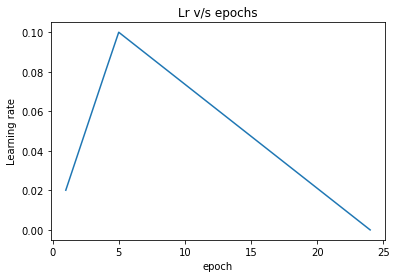

In [19]:
import matplotlib.pyplot as plt
from drishtypy.learner import learner
epochs = []
for i in range(24):
  epochs.append(i+1)

plt.plot(epochs,learner.LR)
plt.ylabel('Learning rate')
plt.xlabel("epoch")
plt.title("Lr v/s epochs")
plt.show()